In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

acy = pd.read_csv('C:/Users/shahi/Downloads/TxtInOut_APEX1501_modified/TxtInOut/SITE14.ACY',
                  delimiter=r'\s+', skiprows=8)
#acy = pd.read_csv('C:/Users/shahi/Downloads/TxtInOut_APEX1501_exdata/TxtInOut/SITE14.ACY', delimiter=r'\s+', skiprows=8)
#acy = pd.read_csv('C:/Users/shahi/Downloads/APEX_China/SITE1.ACY', delimiter=r'\s+', skiprows=8)
acy.columns=acy.columns.str.strip()
acy.columns

Index(['SA#', 'ID', 'YR', 'YR#', 'CPNM', 'YLDG', 'YLDF', 'BIOM', 'WS', 'NS',
       'PS', 'KS', 'TS', 'AS', 'SS', 'ZNO3', 'ZQP', 'AP15', 'ZOC', 'OCPD',
       'RSDP', 'ARSD', 'IRGA', 'FN', 'FP', 'FNMN', 'FNMA', 'FNO', 'FPL', 'FPO',
       'YTHS', 'YWTH'],
      dtype='object')

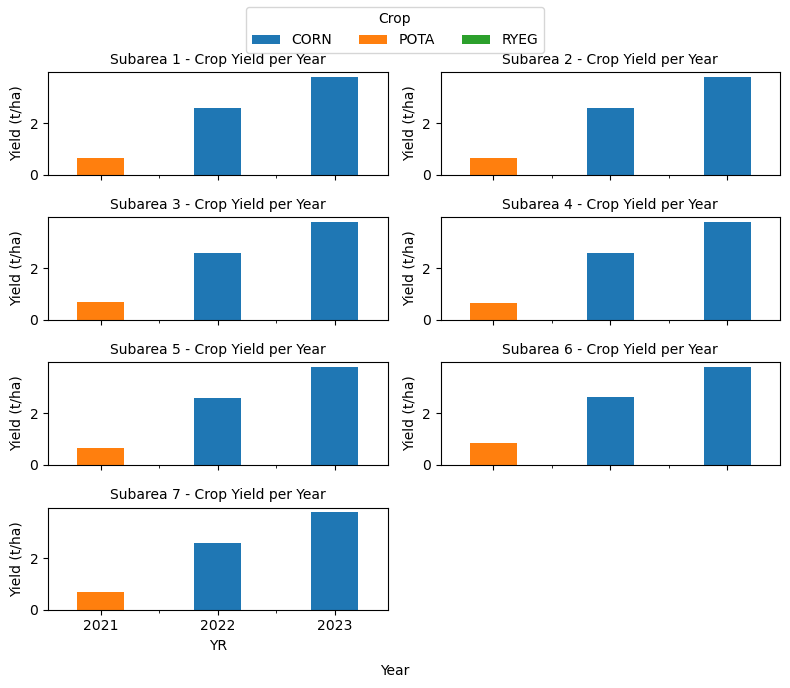

In [2]:
subareas = sorted(acy['SA#'].unique())
n_subareas = len(subareas)

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8,7), sharex=True)
axes = axes.flatten()

for i, sa in enumerate(subareas):
    ax = axes[i]
    sub_acy = acy[acy['SA#'] == sa]
    
    # Pivot to get yields per crop per year
    pivot = sub_acy.pivot_table(index='YR', columns='CPNM', values='YLDG', aggfunc='sum')
    pivot.plot(kind='bar', ax=ax, width=0.4, stacked=True, legend=False)
    years = pivot.index
    crops = pivot.columns
    n_crops = len(crops)

    ax.set_title(f'Subarea {sa} - Crop Yield per Year', fontsize=10)
    ax.set_ylabel('Yield (t/ha)')
    ax.set_xticklabels(years, rotation=0)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # ensure integer years
    ax.tick_params(axis='x', labelrotation=0)

if n_subareas < len(axes):
    axes[n_subareas].axis('off')

# Common legend outside the plots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=5, title='Crop')

#plt.xlabel('Year')
fig.text(0.5, 0.04, 'Year', ha='center')
fig.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

# for (subarea,crop), group in acy.groupby(['SA#', 'CPNM']):
#     plt.bar(group['YR'], group['YLDG'], label = f'SA {subarea} - {crop}')
    
# plt.bar('YR', 'YLDG', label = f'SA {subarea} - {crop}')

# plt.xlabel('Year')
# plt.ylabel('Yield (T/ha)')
# plt.legend()
# start, end = ax.get_xlim()
# ax.xaxis.set_ticks(np.arange(start, end, 1))
# ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
